# Analytic study of the null singularity inside spherical charged black holes by Burko and Ori
##  Geoff Cope
##  Univeristy of Utah
##  January 4, 2022

Here we work with metric 1 which is the general spherically symmetric line element in double null coordinates.  These are just the vacuum field equations, will go back and add stress energy tensor at antoher time.

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.57.R7084

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
u,v,theta,phi,du,dv,dtheta,dphi = symbols( 'u v theta phi du dv dtheta dphi' ) 

In [5]:
f = Function('f')(u,v)
f

In [6]:
r = Function('r')(u,v)
r

In [7]:
variables = Matrix( [u,v,theta,phi] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [8]:
differentials = Matrix( [du,dv,dtheta,dphi] ) 
differentials

⎡  du  ⎤
⎢      ⎥
⎢  dv  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [9]:
lineElement = expand( - f*du*dv +r**2 * (dtheta**2 + sin(theta)**2 * dphi**2 ) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡           -f(u, v)                             ⎤
⎢    0      ─────────     0             0        ⎥
⎢               2                                ⎥
⎢                                                ⎥
⎢-f(u, v)                                        ⎥
⎢─────────      0         0             0        ⎥
⎢    2                                           ⎥
⎢                                                ⎥
⎢                       2                        ⎥
⎢    0          0      r (u, v)         0        ⎥
⎢                                                ⎥
⎢                                 2          2   ⎥
⎣    0          0         0      r (u, v)⋅sin (θ)⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡           -f(u, v)                             ⎤
⎢    0      ─────────     0             0        ⎥
⎢               2                                ⎥
⎢                                                ⎥
⎢-f(u, v)                                        ⎥
⎢─────────      0         0             0        ⎥
⎢    2                                           ⎥
⎢                                                ⎥
⎢                       2                        ⎥
⎢    0          0      r (u, v)         0        ⎥
⎢                                                ⎥
⎢                                 2          2   ⎥
⎣    0          0         0      r (u, v)⋅sin (θ)⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("u v theta phi")
u,v,theta,phi = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                                                                        
⎢⎡∂                                                                   ⎤  ⎡0       0                 0                          0         
⎢⎢──(f(u, v))                                                         ⎥  ⎢                                                               
⎢⎢∂u                                                                  ⎥  ⎢   ∂                                                           
⎢⎢───────────  0            0                          0              ⎥  ⎢   ──(f(u, v))                                                 
⎢⎢  f(u, v)                                                           ⎥  ⎢   ∂v                                                          
⎢⎢                                                                    ⎥  ⎢0  ───────────            0                          0         
⎢⎢     0       0            0     

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡      ⎛            2                                   ⎞                                                                                
⎢      ⎜           ∂             ∂           ∂          ⎟              2                2                                                
⎢    2⋅⎜- f(u, v)⋅───(r(u, v)) + ──(f(u, v))⋅──(r(u, v))⎟             ∂                ∂              ∂           ∂                      
⎢      ⎜            2            ∂u          ∂u         ⎟         2⋅─────(r(u, v))   ─────(f(u, v))   ──(f(u, v))⋅──(f(u, v))            
⎢      ⎝          ∂u                                    ⎠           ∂v ∂u            ∂v ∂u            ∂u          ∂v                     
⎢    ────────────────────────────────────────────────────       - ──────────────── - ────────────── + ───────────────────────            
⎢                      f(u, v)⋅r(u, v)                                r(u, v)           f(u, v)                2                         
⎢                                 

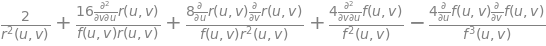

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                  ⎛            2                                   ⎞                    
⎢                                                                  ⎜           ∂             ∂           ∂          ⎟                    
⎢                                                                2⋅⎜- f(u, v)⋅───(r(u, v)) + ──(f(u, v))⋅──(r(u, v))⎟                    
⎢                                                                  ⎜            2            ∂u          ∂u         ⎟                    
⎢                                                                  ⎝          ∂u                                    ⎠                    
⎢                                                                ────────────────────────────────────────────────────                    
⎢                                                                                  f(u, v)⋅r(u, v)                                       
⎢                                 

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢     ⎡                                                               2                                          ⎤                       
⎢     ⎢                                                              ∂              ∂           ∂                ⎥                       
⎢     ⎢                                                  - f(u, v)⋅─────(f(u, v)) + ──(f(u, v))⋅──(f(u, v))      ⎥                       
⎢     ⎢                           

In [21]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                 

In [23]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡              ⎛            2                                   ⎞                                                                        
⎢              ⎜           ∂             ∂           ∂          ⎟                  ⎛                             2                       
⎢            2⋅⎜- f(u, v)⋅───(r(u, v)) + ──(f(u, v))⋅──(r(u, v))⎟                  ⎜                            ∂                  ∂     
⎢              ⎜            2            ∂u          ∂u         ⎟              1.0⋅⎜0.5⋅f(u, v) + 2.0⋅r(u, v)⋅─────(r(u, v)) + 2.0⋅──(r(u
⎢              ⎝          ∂u                                    ⎠                  ⎝                          ∂v ∂u                ∂u    
⎢            ────────────────────────────────────────────────────              ──────────────────────────────────────────────────────────
⎢                              f(u, v)⋅r(u, v)                                                                    2                      
⎢                                 

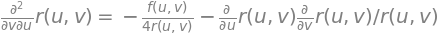

In [29]:
equation5 = Eq(diff(r,u,v), expand ( solve( Ric.tensor()[2,2], diff(r,u,v) )[0] ) )
equation5

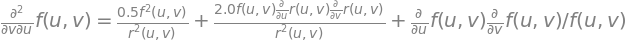

In [46]:
equation6 = Eq( diff(f,u,v),expand(simplify(solve( einsteinSimplified[2,2].args[2], diff(f,u,v) )[0].subs(equation5.args[0],equation5.args[1]))))
equation6

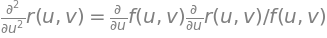

In [36]:
equation7 = Eq(diff(r,u,u),solve( einsteinSimplified[0,0], diff(r,u,u) )[0] ) 
equation7

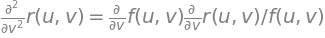

In [37]:
equation8 = Eq(diff(r,v,v),solve( einsteinSimplified[1,1], diff(r,v,v) )[0] ) 
equation8 

In [48]:
vacuumFieldEquations = Matrix([equation5,equation6,equation7,equation8])
vacuumFieldEquations

⎡                                                  ∂           ∂                              ⎤
⎢                      2                           ──(r(u, v))⋅──(r(u, v))                    ⎥
⎢                     ∂                 f(u, v)    ∂u          ∂v                             ⎥
⎢                   ─────(r(u, v)) = - ───────── - ───────────────────────                    ⎥
⎢                   ∂v ∂u              4⋅r(u, v)           r(u, v)                            ⎥
⎢                                                                                             ⎥
⎢                                            ∂           ∂             ∂           ∂          ⎥
⎢   2                  2         2.0⋅f(u, v)⋅──(r(u, v))⋅──(r(u, v))   ──(f(u, v))⋅──(f(u, v))⎥
⎢  ∂              0.5⋅f (u, v)               ∂u          ∂v            ∂u          ∂v         ⎥
⎢─────(f(u, v)) = ──────────── + ─────────────────────────────────── + ───────────────────────⎥
⎢∂v ∂u               2                  